In [1]:
import numpy as np
from mpl_toolkits import mplot3d
import open3d as o3d
import glob
import os
import os.path
import statistics as stats
from operator import itemgetter
from sklearn.cluster import SpectralClustering, KMeans, AffinityPropagation
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Linear Sliceing Method
## Sort by Y

In [2]:
# Testing Ground
plant = 'plant3_bb_sim.ply'
# Slicing out a portion

# Read .ply file
pcd_whole = o3d.io.read_point_cloud(plant)
ar_whole_field = np.asarray(pcd_whole.points)

type(ar_whole_field)

numpy.ndarray

In [1]:
linear_matrix = []

intermed_list = []

a = ar_whole_field[0][0]
cnt = 1
for i in ar_whole_field:
    if abs(i[0] - a) < 10:
        intermed_list.append(list(i))

        a = i[0]

        print(f'Building intermed list: {len(intermed_list)}')



    
    else:
        cnt+=1
        pcd_slice = o3d.geometry.PointCloud()
        pcd_slice.points = o3d.utility.Vector3dVector(intermed_list)
        o3d.io.write_point_cloud(f'/home/travis_s/data/test_plys/{cnt}_slice.ply', pcd_slice)
        linear_matrix.append(intermed_list)

        intermed_list = []

        a = i[0]

        print('done')

        

In [4]:
# print(intermed_list)

# I need to take the above, make it now iterate over the whole file, each element in the list linear matrix will be a 'slice'

'/home/travis/repos/radial-slicing'

# Now we work on clustering

In [5]:
pwd

'/home/travis_s/repos/radial-slicing'

In [6]:
ground_slice = r"/home/travis_s/data/test_plys/20_slice.ply"

middle_slice = r"/home/travis_s/data/test_plys/116_slice.ply"

In [7]:
# Read .ply files
pcd_ground_slice = o3d.io.read_point_cloud(ground_slice)
ar_ground_slice = np.asarray(pcd_ground_slice.points)

pcd_middle_slice = o3d.io.read_point_cloud(middle_slice)
ar_middle_slice = np.asarray(pcd_middle_slice.points)

# Dropping y to flatten

In [8]:
middle_slice = r"/home/travis_s/data/test_plys/120_slice.ply"
pcd_middle_slice = o3d.io.read_point_cloud(middle_slice)
ar_middle_slice = np.asarray(pcd_middle_slice.points)

flat_middle = []

for i in ar_middle_slice:
    flat_middle.append(list(i))
print(len(flat_middle))

for j in flat_middle: 
    del j[1] 

km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

X = np.array(flat_middle)
y_km = km.fit_predict(X)

461


In [9]:
y_km[1]

3

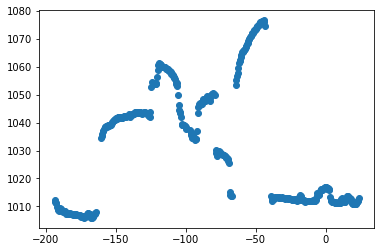

In [10]:
x = [x for x, y in flat_middle]
y = [y for x, y in flat_middle]

plt.scatter(x, y)
plt.show()

In [14]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)





In [15]:
X = np.array(flat_middle)
y_km = km.fit_predict(X)
# y_km = sc.fit_predict(X)


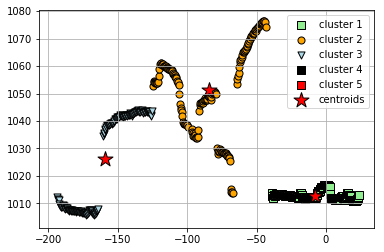

In [16]:

# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    X[y_km == 3, 0], X[y_km == 3, 1],
    s=50, c='black',
    marker='s', edgecolor='black',
    label='cluster 4'
)

plt.scatter(
    X[y_km == 4, 0], X[y_km == 4, 1],
    s=50, c='red',
    marker='s', edgecolor='black',
    label='cluster 5'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'


)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [36]:
X, y = make_blobs(
   n_samples=150, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)

In [38]:
type(X)

numpy.ndarray

In [ ]:
# 